# Table of Contents

- [Introduction](#introduction)
- [1. Importing Packages](#section-one)
- [2. Loading Data](#section-two)
    - [2.1 Overview of the Data](#subsection-one)
- [3. Data Preprocessing Steps: Enhancing the Data for Analysis](#section-three)
    - [3.1. Change the columns names to lower case](#subsection-one)
    - [3.2. Check the missing values](#subsection-two)
    - [3.3. Dropping the missing values](#subsection-three)
    - [3.4. Check the counts and descriptive of some columns](#subsection-four)
    - [3.5. Replacing missing values](#subsection-five)   
    - [3.6. Fix the dates and change the datatype](#subsection-six)
    - [3.7. Check the counts and descriptive of popularity column](#subsection-seven)      
- [4. Exploratory Data Analysis 1](#section-four)
- [5. Feature Engineering](#section-five)
- [6. Exploratory Data Analysis 2](#section-six)
- [7. Modeling](#section-seven)


<a id="section-one"></a>
# 1. Importing Packages 

In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  
from sklearn.model_selection import ShuffleSplit, cross_validate, cross_val_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


<a id="section-two"></a>
# 2. Loading Data 

In [115]:
df_train = pd.read_csv("C:/Users/ADETAYO/Downloads/tmdb-box-office-prediction(1)/data/train.csv", index_col="id")
df_test = pd.read_csv("C:/Users/ADETAYO/Downloads/tmdb-box-office-prediction(1)/data/test.csv", index_col="id")

<a id="subsection-one"></a>
## 2.1 Overview of the Data

In [116]:
print(f"The train dataset contains {df_train.shape[0]} columns and {df_train.shape[1]} features.")

df_train.head()

The train dataset contains 3000 columns and 22 features.


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [117]:
print(f"The train dataset contain {df_train.shape[1] - 1} columns.")

The train dataset contain 21 columns.


In [118]:
print(f"The test dataset contains {df_test.shape[0]} samples and {df_test.shape[1] - 1} columns.")

df_test.head()

The test dataset contains 4398 samples and 20 columns.


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [119]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 3001 to 7398
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  877 non-null    object 
 1   budget                 4398 non-null   int64  
 2   genres                 4382 non-null   object 
 3   homepage               1420 non-null   object 
 4   imdb_id                4398 non-null   object 
 5   original_language      4398 non-null   object 
 6   original_title         4398 non-null   object 
 7   overview               4384 non-null   object 
 8   popularity             4398 non-null   float64
 9   poster_path            4397 non-null   object 
 10  production_companies   4140 non-null   object 
 11  production_countries   4296 non-null   object 
 12  release_date           4397 non-null   object 
 13  runtime                4394 non-null   float64
 14  spoken_languages       4356 non-null   object 
 15  s

In [121]:
df_train.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [122]:
df_test.describe()

,budget,popularity,runtime
count,4.398000e+03,4398.000000,4394.000000
mean,2.264929e+07,8.550230,107.622212
std,3.689991e+07,12.209014,21.058290
min,0.000000e+00,0.000001,0.000000
25%,0.000000e+00,3.895186,94.000000
50%,7.450000e+06,7.482242,104.000000
75%,2.800000e+07,10.938524,118.000000
max,2.600000e+08,547.488298,320.000000


<a id="section-three"></a>
# 3. Data Preprocessing Steps: Enhancing the Data for Analysis

<a id="subsection-one"></a>
## 3.1. Change the columns names to lower case 

In [123]:
df_train.columns = df_train.columns.str.lower()

df_test.columns = df_test.columns.str.lower() 

<a id="subsection-two"></a>
## 3.2. Check the missing values 

In [124]:
def get_missing_values(data): 
    missing = data.isnull().sum(axis="index")
    return missing[missing != 0]

In [125]:
get_missing_values(df_train)

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
keywords                  276
cast                       13
crew                       16
dtype: int64

In [126]:
train_missing_cols = get_missing_values(df_train).index.to_list()

for column in train_missing_cols: 
    missing = df_train[column].isnull().sum() / df_train.shape[0]
    print(f"{column:{20}}: =========> {missing * 100:.2f}%")

belongs_to_collection: =========> 79.87%
genres              : =========> 0.23%
homepage            : =========> 68.47%
overview            : =========> 0.27%
poster_path         : =========> 0.03%
production_companies: =========> 5.20%
production_countries: =========> 1.83%
runtime             : =========> 0.07%
spoken_languages    : =========> 0.67%
tagline             : =========> 19.90%
keywords            : =========> 9.20%
cast                : =========> 0.43%
crew                : =========> 0.53%


In [127]:
get_missing_values(df_test)

belongs_to_collection    3521
genres                     16
homepage                 2978
overview                   14
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
keywords                  393
cast                       13
crew                       22
dtype: int64

In [128]:
test_missing_cols = get_missing_values(df_test).index.to_list()

for column in test_missing_cols: 
    missing = df_test[column].isnull().sum() / df_test.shape[0]
    print(f"{column:{20}}: =============> {missing * 100:.2f}%")

belongs_to_collection: =============> 80.06%
genres              : =============> 0.36%
homepage            : =============> 67.71%
overview            : =============> 0.32%
poster_path         : =============> 0.02%
production_companies: =============> 5.87%
production_countries: =============> 2.32%
release_date        : =============> 0.02%
runtime             : =============> 0.09%
spoken_languages    : =============> 0.95%
status              : =============> 0.05%
tagline             : =============> 19.62%
title               : =============> 0.07%
keywords            : =============> 8.94%
cast                : =============> 0.30%
crew                : =============> 0.50%


<a id="subsection-three"></a>
## 3.3. Dropping the missing values 

In [129]:
train_data_missing_rows = ["genres", "overview", "poster_path", "production_companies", "production_countries", 
                           "runtime", "spoken_languages", "tagline", "keywords", "cast", "crew"]

df_train = df_train.dropna(subset=train_data_missing_rows, axis="index")

get_missing_values(df_train)

belongs_to_collection    1708
homepage                 1486
dtype: int64

In [130]:
test_data_missing_rows = ["genres", "overview", "poster_path", "production_companies", "production_countries", 
                          "release_date", "runtime", "spoken_languages", "status", "tagline", 
                          "title", "keywords", "cast", "crew"]

df_test = df_test.dropna(subset=test_data_missing_rows, axis="index")

get_missing_values(df_test)

belongs_to_collection    2514
homepage                 2150
dtype: int64

<a id="subsection-four"></a>
## 3.4. Check the counts and descriptive of some columns 

In [131]:
df_train["belongs_to_collection"].value_counts()

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                     16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]               7
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                 5
[{'id': 9485, 'name': 'The Fast and the Furious Collection', 'poster_path': '/mCkqJf4ijbNoBWvJ0RTWZJuhJUA.jpg', 'backdrop_path': '/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg'}]      4
[{'id': 5039, 'name': 'Rambo Collection', 'poster_path': '/feGOEOVrOLyjtEnVa88rQLgD3XY.jpg', 'backdrop_path': '/Yt2ZxbJv2HM842B6FNMr59Vhyb.jpg'}]                          4
                                                                                                                                       

In [132]:
df_train["belongs_to_collection"].nunique()

363

In [133]:
df_train["homepage"].value_counts()

http://www.transformersmovie.com/        4
http://www.lordoftherings.net/           2
http://www.thehobbit.com/                2
http://sonyclassics.com/whiplash/        1
http://www.foxmovies.com/movies/spy      1
                                        ..
http://movies.disney.com/the-pacifier    1
http://admiralfilm.ru/                   1
http://www.jackreachermovie.com/         1
http://www.sleepdealer.com/              1
http://www.abductionthefilm.com/         1
Name: homepage, Length: 738, dtype: int64

In [134]:
df_train["homepage"].nunique()

738

In [135]:
df_train["homepage"].describe()

count                                   743
unique                                  738
top       http://www.transformersmovie.com/
freq                                      4
Name: homepage, dtype: object

<a id="subsection-five"></a>
## 3.5. Replacing missing values 

In [136]:
def replace_missing_with_default(data, columns, default_value="Not given"):

    # Check if the DataFrame and specified columns exist
    if not isinstance(data, pd.DataFrame): 
        raise ValueError("data must be pandas DataFrame")
    
    if not all(col in data.columns for col in columns): 
        raise ValueError("One or more specified columns do not exist in the DataFrame")
    
    # Make a copy of the DataFrame to avoid modifying the original 
    data_copy = data.copy()

    # Replace missing values in the specified columns with the default values
    data_copy[columns] = data_copy[columns].fillna(default_value)

    return data_copy

In [137]:
df_train = replace_missing_with_default(df_train, columns=["belongs_to_collection", "homepage"])

In [138]:
get_missing_values(df_train)

Series([], dtype: int64)

In [139]:
df_test = replace_missing_with_default(df_test, columns=["belongs_to_collection", "homepage"])

get_missing_values(df_test)

Series([], dtype: int64)

<a id="subsection-six"></a>
## 3.6. Fix the dates and change the datatype 

In [140]:
def fix_dates(dates): 
    try: 
        year = str(dates).split("/")[2]
        if int(year) <= 9:
            date = dates[:-2] + "20" + year
        else:
            date = dates[:-2] + "19" + year
    except:
        date = np.nan
    return date           


In [141]:
df_train["release_date"] = df_train["release_date"].apply(fix_dates)

df_train["release_date"].head()

id
1      2/20/1915
2       8/6/2004
3     10/10/1914
9      2/16/1996
10     4/16/2003
Name: release_date, dtype: object

In [142]:
df_train["release_date"] = pd.to_datetime(df_train["release_date"])

df_train["release_date"].value_counts()

1913-07-18    4
2006-09-15    4
1995-12-22    4
2007-02-09    4
2001-05-11    4
             ..
2006-06-16    1
1911-10-14    1
1993-09-17    1
1985-06-28    1
1911-09-22    1
Name: release_date, Length: 1897, dtype: int64

<a id="subsection-seven"></a>
## 3.7. Check the counts and descriptive of popularity column 

In [143]:
df_train["popularity"].value_counts()

6.575393     1
10.869056    1
10.414363    1
13.495247    1
5.228837     1
            ..
7.122938     1
9.763928     1
7.122093     1
14.505987    1
10.512109    1
Name: popularity, Length: 2229, dtype: int64

In [144]:
df_train["popularity"].describe()

count    2229.000000
mean        9.691973
std        12.043572
min         0.007294
25%         5.772293
50%         8.364201
75%        11.552956
max       287.253654
Name: popularity, dtype: float64

<a id="section-four"></a>
# 4. Exploratory Data Analysis 1

### What is the distribution of movie statuses throughout the entire dataset?

In [145]:
def count_plot(data, x, title, palette="viridis", **kwargs): 

    plt.figure(figsize=(12, 5))
    sns.countplot(x=x, palette=palette, data=data, **kwargs)
    plt.title(title, fontsize=20)
    plt.xlabel(x, fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

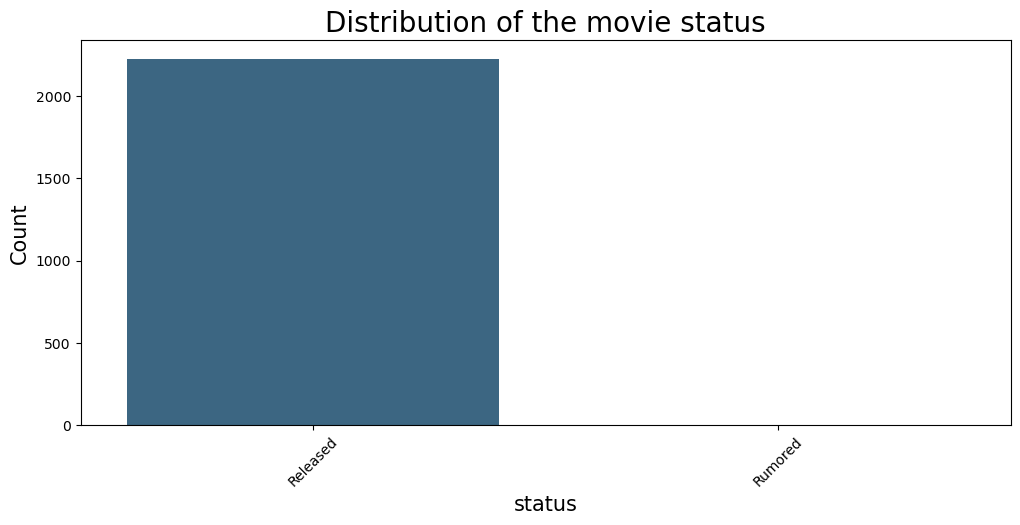

In [146]:
count_plot(df_train, x="status", title="Distribution of the movie status")

**Observation:** Only one movie is Rumoured while all the other movies in the dataset are released 

### How distributed is the revenue from the dataset? 

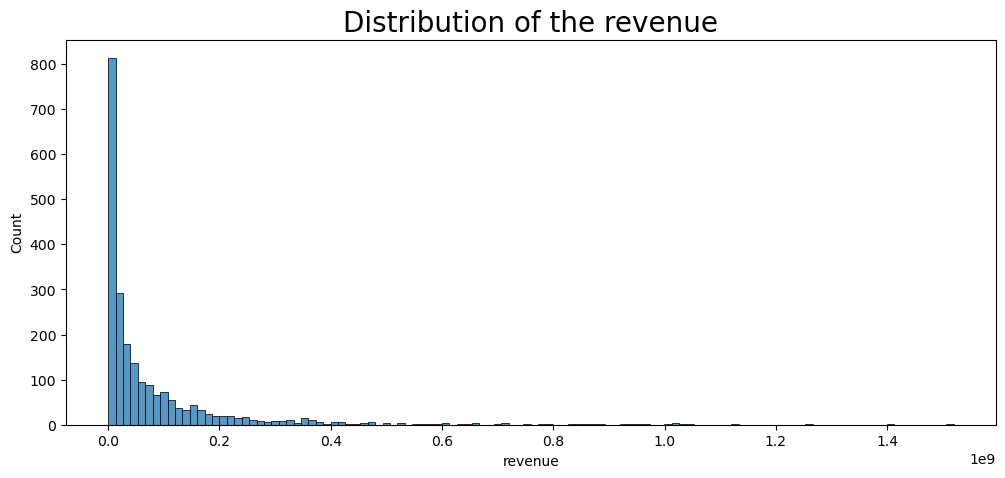

In [147]:
plt.figure(figsize=(12, 5))

sns.histplot(x="revenue", data=df_train)
plt.title("Distribution of the revenue", fontsize=20)
plt.show()

**Observation:** The revenue is skewed to the right which means around 1 billion and 1.2 billion 

### Is the budget also skewed from the dataset?

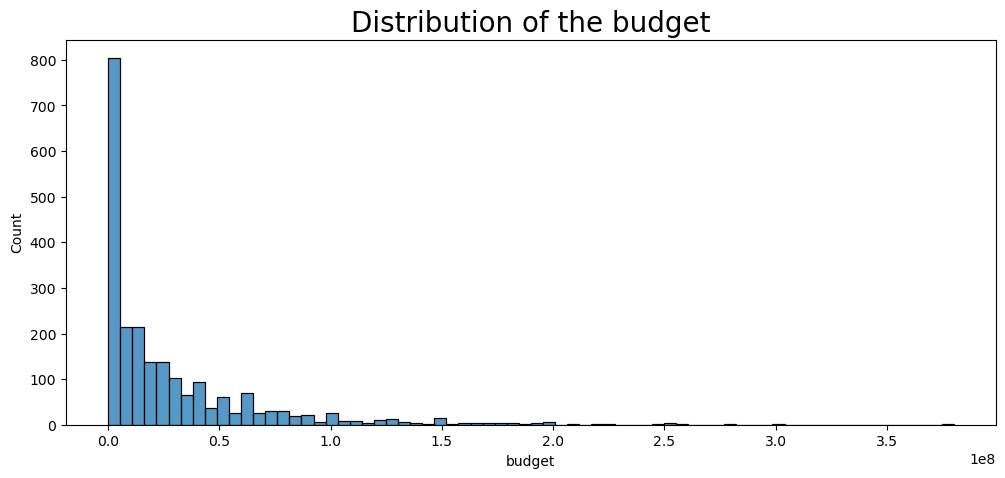

In [148]:
plt.figure(figsize=(12, 5))

sns.histplot(x="budget", data=df_train)
plt.title("Distribution of the budget", fontsize=20)
plt.show()

**Observation:** The budget is also skewed which is skewed to the right which means most of the budget are in the range of 100 million and 1 billion

### What is the most popular language for movies in the dataset?

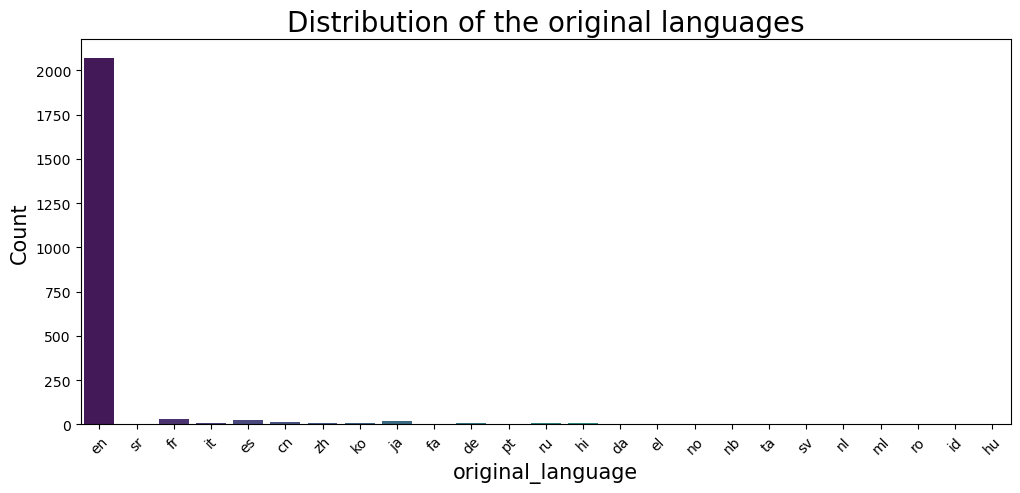

In [149]:
count_plot(x="original_language", data=df_train, title="Distribution of the original languages")

**Observation:** Most of the original language for most movies in the dataset is English

### Is there evidence of outliers in the movie runtime data?

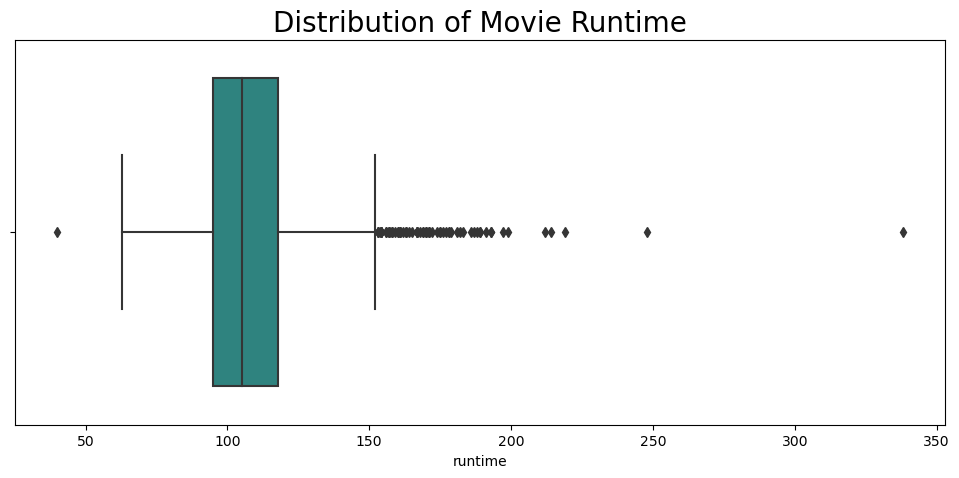

In [150]:
plt.figure(figsize=(12, 5))

sns.boxplot(x="runtime", palette="viridis", data=df_train)
plt.title("Distribution of Movie Runtime", fontsize=20)
plt.show()

**Observation:** There are couple of outliers in the runtime column, which are extreme like around 300+ and below 50 

### Does the movie popularity look normally distributed?

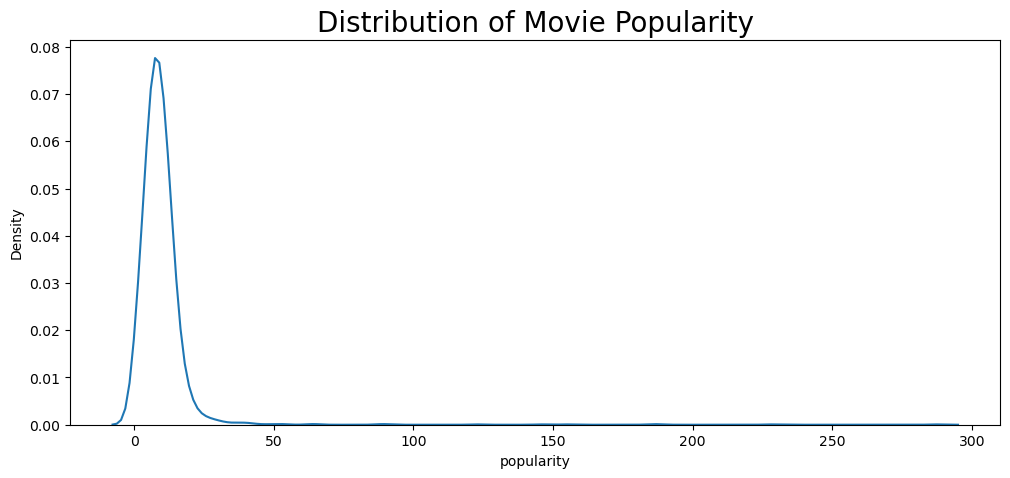

In [151]:
plt.figure(figsize=(12, 5))

sns.kdeplot(x="popularity", data=df_train)
plt.title("Distribution of Movie Popularity", fontsize=20)
plt.show()

**Observation:** The popularity column is skewed to the right which means it is not normally distributed   

### What are the top 10 movies with the highest revenue? 

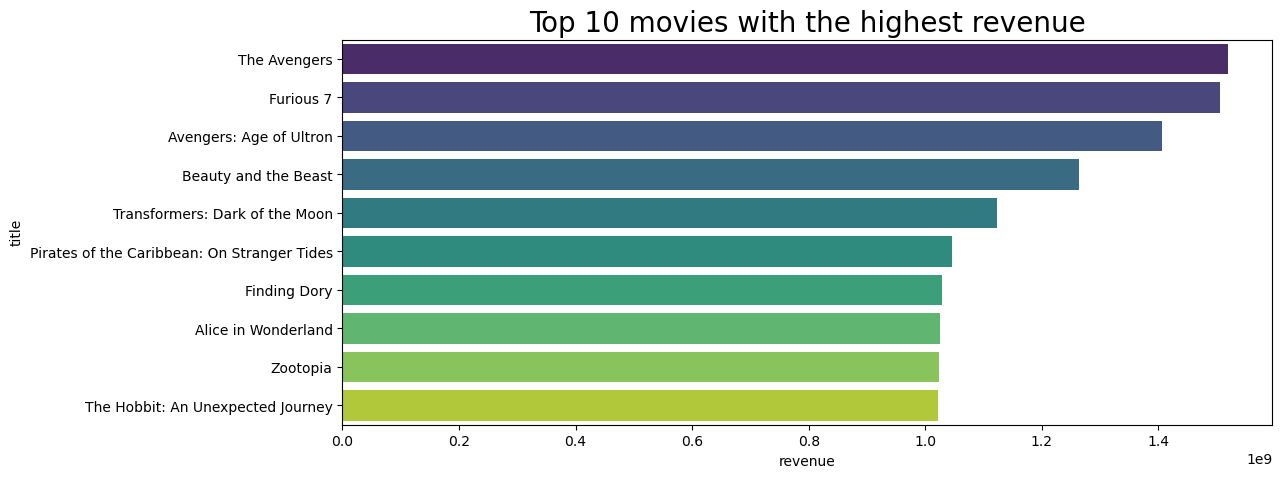

In [152]:
plt.figure(figsize=(12, 5))

top_10_movies_by_revenue = df_train.nlargest(10, "revenue")
sns.barplot(x="revenue", y="title", palette="viridis", data=top_10_movies_by_revenue)
plt.title("Top 10 movies with the highest revenue", fontsize=20)
plt.show()

**Observation:** The movie with the highest revenue is The Avengers which is followed by Furious 7

### What is the movie with the highest budget in the dataset? 

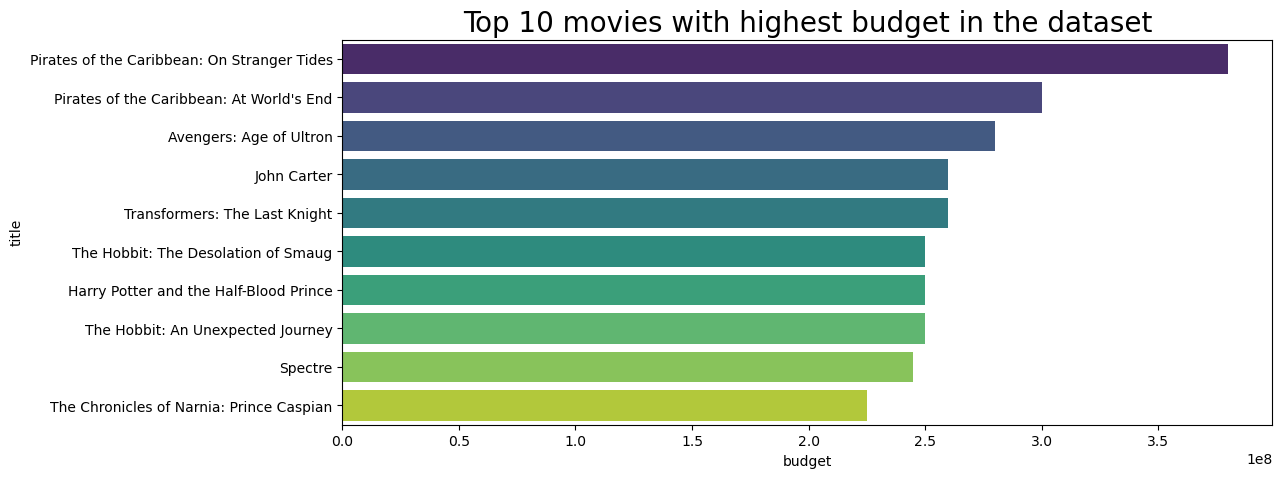

In [153]:
plt.figure(figsize=(12, 5))

top_10_movies_by_budget = df_train.nlargest(10, "budget")
sns.barplot(y="title", x="budget", palette="viridis", data=top_10_movies_by_budget)
plt.title("Top 10 movies with highest budget in the dataset", fontsize=20)
plt.show()

**Observation:** Pirates of the Caribbean: On Stranger Tides happens to be the movie with the highest budget followed by another Pirate Caribbean movie  

### Is there any discernible correlation or pattern between a movie's popularity and its budget?

In [154]:
def scatter_plot(x, y, title, data, **kwargs): 
    plt.figure(figsize=(12, 5))

    sns.scatterplot(x=x, y=y, data=data, **kwargs)
    plt.title(title, fontsize=20)
    plt.show()

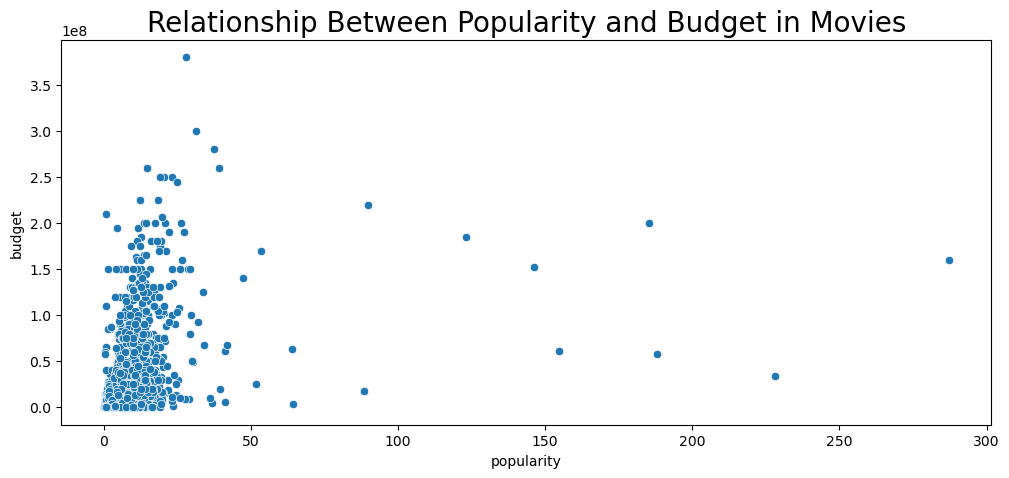

In [155]:
scatter_plot(x="popularity", y="budget", title="Relationship Between Popularity and Budget in Movies", 
             data=df_train)

**Observation:** Movies with popular ratings tend to have high budget likewise movies with low budget tend to have low popularity which kind of show there is a correlation between popularity and budget

### What is the relationship between Revenue and Budget?


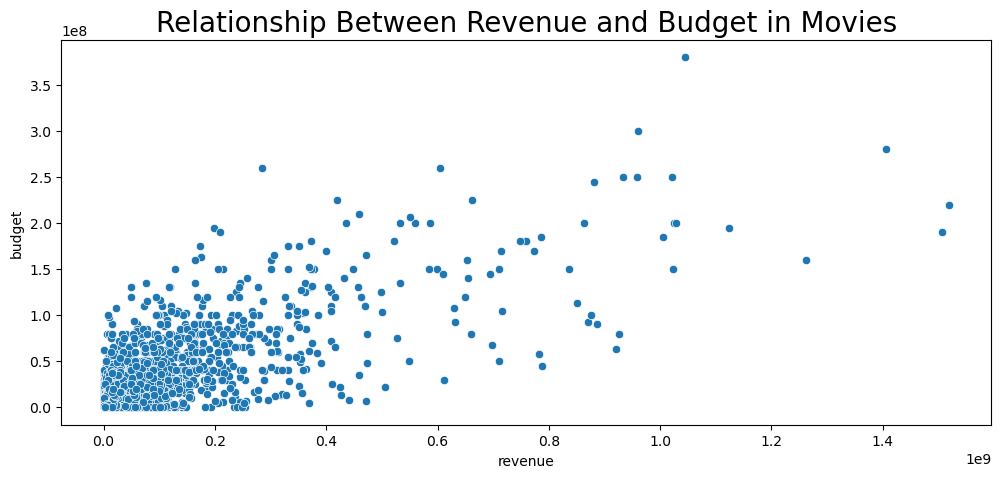

In [156]:
scatter_plot(x="revenue", y="budget", title="Relationship Between Revenue and Budget in Movies", 
             data=df_train)

**Observation:** There is a sort of correlation between movies with big budget also having high revenue same with movies with small budget having small revenue.        

<a id="section-five"></a>
# 5. Feature Engineering

In [157]:
def extract_names(row): 
    try: 
        name_list = eval(row)
        names = [item.get("name") for item in name_list if isinstance(item, dict) and "name" in item]
        return names 
    except (ValueError, SyntaxError):
        return []


In [158]:
def extract_names_count(row):
    try: 
        name_list = eval(row) 
        names = [item["name"] for item in name_list if isinstance(item, dict) and "name" in item]
        return len(names)
    except (ValueError, SyntaxError): 
        return 0 

In [159]:
df_train["production_companies_counts"] = df_train["production_companies"].apply(extract_names_count)

df_train["production_companies_counts"]

id
1       3
2       1
3       3
9       3
10      1
       ..
2995    1
2996    2
2998    3
2999    2
3000    6
Name: production_companies_counts, Length: 2229, dtype: int64

In [160]:
df_train["production_companies"] = df_train["production_companies"].apply(extract_names)

df_train["production_companies"]

id
1       [Paramount Pictures, United Artists, Metro-Gol...
2                                  [Walt Disney Pictures]
3       [Bold Films, Blumhouse Productions, Right of W...
9       [Walt Disney Pictures, Jim Henson Productions,...
10                            [Castle Rock Entertainment]
                              ...                        
2995                                 [Paramount Pictures]
2996             [Warner Bros., Morgan Creek Productions]
2998    [New Line Cinema, Forge, The Steve Tisch Company]
2999                   [Jersey Films, Loofah Productions]
3000    [Lions Gate Films, Vertigo Entertainment, Goth...
Name: production_companies, Length: 2229, dtype: object

In [161]:
df_train[["production_companies", "production_companies_counts"]].head()

,production_companies,production_companies_counts
id,,
1,"[Paramount Pictures, United Artists, Metro-Gol...",3
2,[Walt Disney Pictures],1
3,"[Bold Films, Blumhouse Productions, Right of W...",3
9,"[Walt Disney Pictures, Jim Henson Productions,...",3
10,[Castle Rock Entertainment],1


In [162]:
df_train["genres_counts"] = df_train["genres"].apply(extract_names_count)

df_train["genres"] = df_train["genres"].apply(extract_names)

In [163]:
df_train[["genres", "genres_counts"]].head()

,genres,genres_counts
id,,
1,[Comedy],1
2,"[Comedy, Drama, Family, Romance]",4
3,[Drama],1
9,"[Action, Comedy, Music, Family, Adventure]",5
10,"[Comedy, Music]",2


In [164]:
df_train["spoken_languages_counts"] = df_train["spoken_languages"].apply(extract_names_count)

df_train["spoken_languages"] = df_train["spoken_languages"].apply(extract_names)

In [165]:
df_train[["spoken_languages", "spoken_languages_counts"]].sample(3)

,spoken_languages,spoken_languages_counts
id,,
1291,[English],1
1799,[English],1
1594,"[Español, English]",2


In [166]:
df_train["year"] = df_train["release_date"].dt.year
df_train["month"] = df_train["release_date"].dt.month
df_train["day"] = df_train["release_date"].dt.day
df_train["day_of_week"] = df_train["release_date"].dt.day_name()

In [167]:
df_train[["year", "month", "day", "day_of_week"]].sample(3)

,year,month,day,day_of_week
id,,,,
803,1910,8,1,Monday
1363,2009,4,10,Friday
2336,1958,1,29,Wednesday


In [168]:
df_train["production_countries_counts"] = df_train["production_countries"].apply(extract_names_count)

df_train["production_countries"] = df_train["production_countries"].apply(extract_names)

In [169]:
df_train[["production_countries", "production_countries_counts"]].sample(3)

,production_countries,production_countries_counts
id,,
271,[United States of America],1
1985,[United States of America],1
1358,[United Kingdom],1


In [170]:
df_train["keywords_counts"] = df_train["keywords"].apply(extract_names_count)


df_train["keywords"] = df_train["keywords"].apply(extract_names)

In [171]:
df_train[["keywords", "keywords_counts"]].head()

,keywords,keywords_counts
id,,
1,"[time travel, sequel, hot tub, duringcreditsst...",4
2,"[coronation, duty, marriage, falling in love]",4
3,"[jazz, obsession, conservatory, music teacher,...",12
9,"[island, pirate gang, puppet, treasure hunt]",4
10,"[mockumentary, folk singer]",2


In [172]:
def extract_character_count(row):
    try:
        character_list = eval(row)
        characters = [item["character"] for item in character_list if isinstance(item, dict) and "character" in item]
        return len(characters)
    except (SyntaxError, TypeError):
        return 0

In [173]:
def extract_character(row):
    try:
        character_list = eval(row)
        characters = [item["character"] for item in character_list if isinstance(item, dict) and "character" in item]
        return characters
    except (SyntaxError, TypeError):
        return []

In [174]:
df_train["cast_counts"] = df_train["cast"].apply(extract_character_count)


df_train["cast"] = df_train["cast"].apply(extract_character)

df_train[["cast", "cast_counts"]].sample(3)

,cast,cast_counts
id,,
848,"[Max Carlyle, Karen, Vernon, Mimi Carlyle, Cha...",8
1243,"[Zak Gibbs, Francesca, Dr. Gibbs, Dr. Earl Dop...",12
447,"[Luc Deveraux, Andrew Scott, NGU, Captain Kevi...",8


In [175]:
df_train["crew_counts"] = df_train["crew"].apply(extract_names_count)

df_train["crew"] = df_train["crew"].apply(extract_names)

df_train[["crew", "crew_counts"]].sample(3)


,crew,crew_counts
id,,
1653,"[Neil LaBute, Neil LaBute]",2
1159,"[Michael Barnathan, Thor Freudenthal, Rick Rio...",29
943,"[Steven Knight, Guy Heeley, Stuart Ford, David...",27


In [176]:
df_train["belongs_to_collection_counts"] = df_train["belongs_to_collection"].apply(extract_names_count)

df_train["belongs_to_collection_counts"].unique()

array([1, 0], dtype=int64)

In [177]:
def clean_collection(collection):
    if not collection:
        return "Not given"
    return collection[0]

In [178]:
df_train["belongs_to_collection"] =  df_train["belongs_to_collection"].apply(extract_names)

df_train["belongs_to_collection"] = df_train["belongs_to_collection"].apply(clean_collection)

df_train[["belongs_to_collection", "belongs_to_collection_counts"]].head(3)

,belongs_to_collection,belongs_to_collection_counts
id,,
1,Hot Tub Time Machine Collection,1
2,The Princess Diaries Collection,1
3,Not given,0


<a id="section-six"></a>
# 6. Exploratory Data Analysis 2

### What day does movies get released the most?

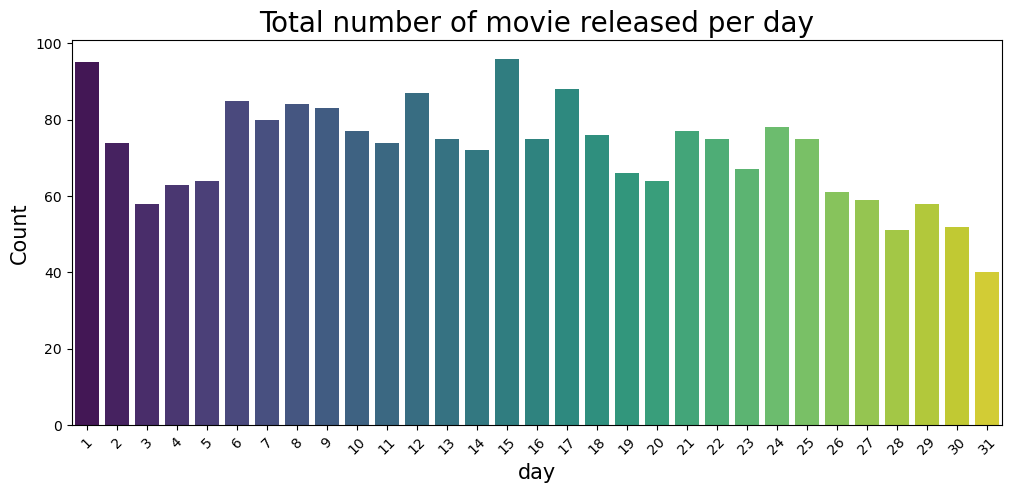

In [179]:
count_plot(x="day", title="Total number of movie released per day", data=df_train)

**Observation:** From the dataset, most movies are released first and mid of every month 


### What day of the week are movies more likely to be released?

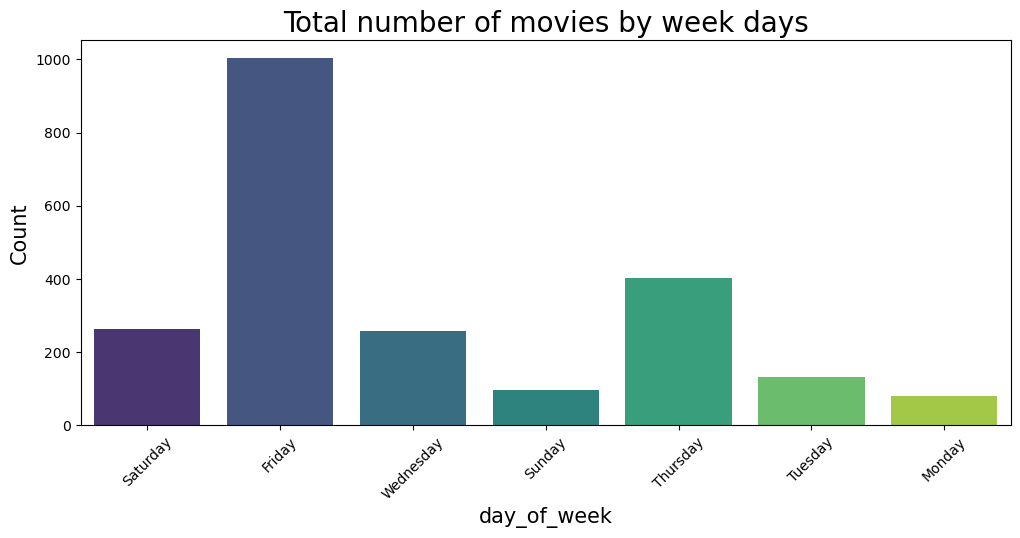

In [180]:
count_plot(df_train, x="day_of_week", title="Total number of movies by week days")

**Observation:** Friday is the day where most movies are likely to be released which is mostly the start of weekend almost everywhere and it is followed by Wednesday which is a weekday.

### How distributed are the revenue for each day of the week?

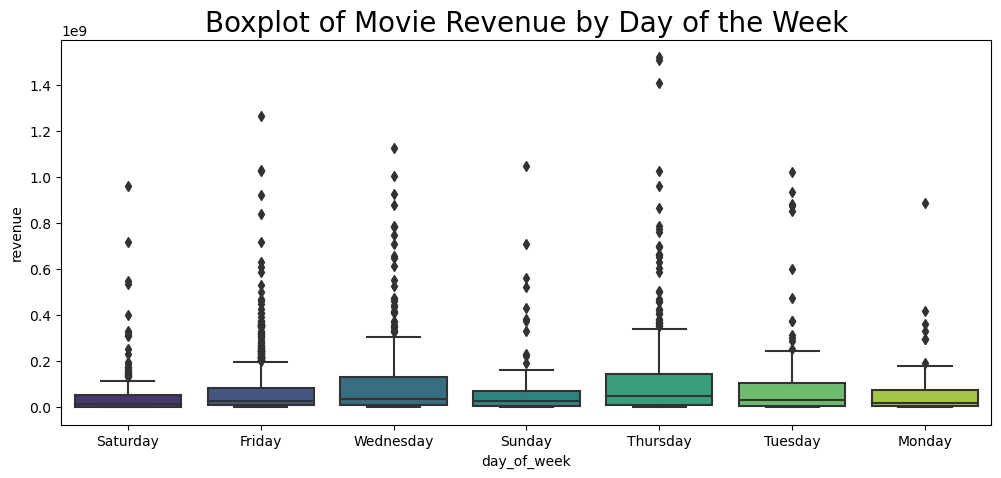

In [181]:
plt.figure(figsize=(12, 5))

sns.boxplot(x="day_of_week", y="revenue", palette="viridis", data=df_train)
plt.title("Boxplot of Movie Revenue by Day of the Week", fontsize=20)
plt.show()

**Observation:** There are many outliers for revenue for each day and the median is not the same which means they are not normally distributed

### What is the distribution of movie genres in the dataset, and which genres appear most frequently?

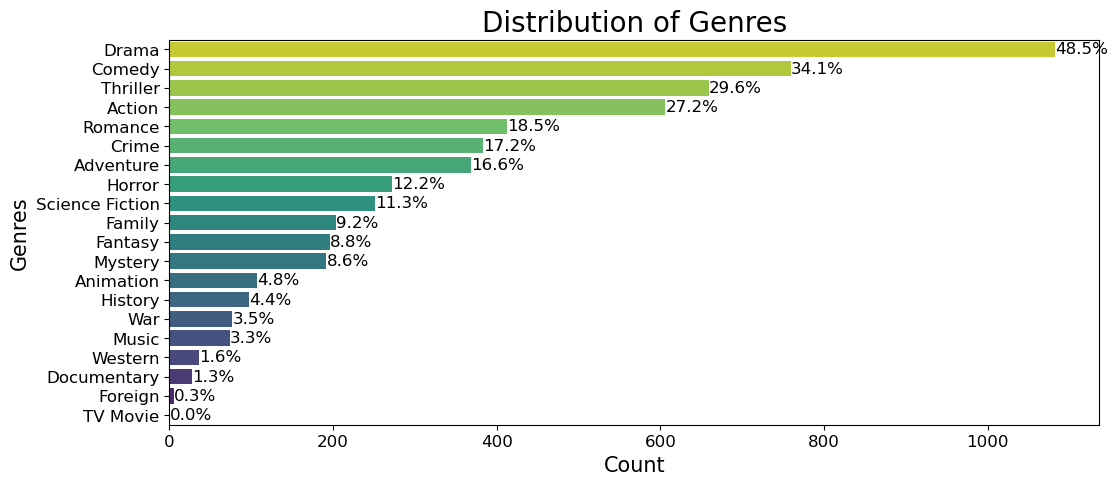

In [182]:
genre_counts = df_train["genres"].explode().value_counts().sort_values(ascending=True)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")

# Annoate bars with percentages
total = len(df_train)
for p in ax.patches: 
    percentage = f"{100 * p.get_width() / total:.1f}%"
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=12, va="center")

plt.title("Distribution of Genres", fontsize=20)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Genres", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis() # Reverse the order of genres
plt.show()


**Observation:** Drama appears to be the most popular genre followed by comedy and action

### What year has the highest budget for movies? 

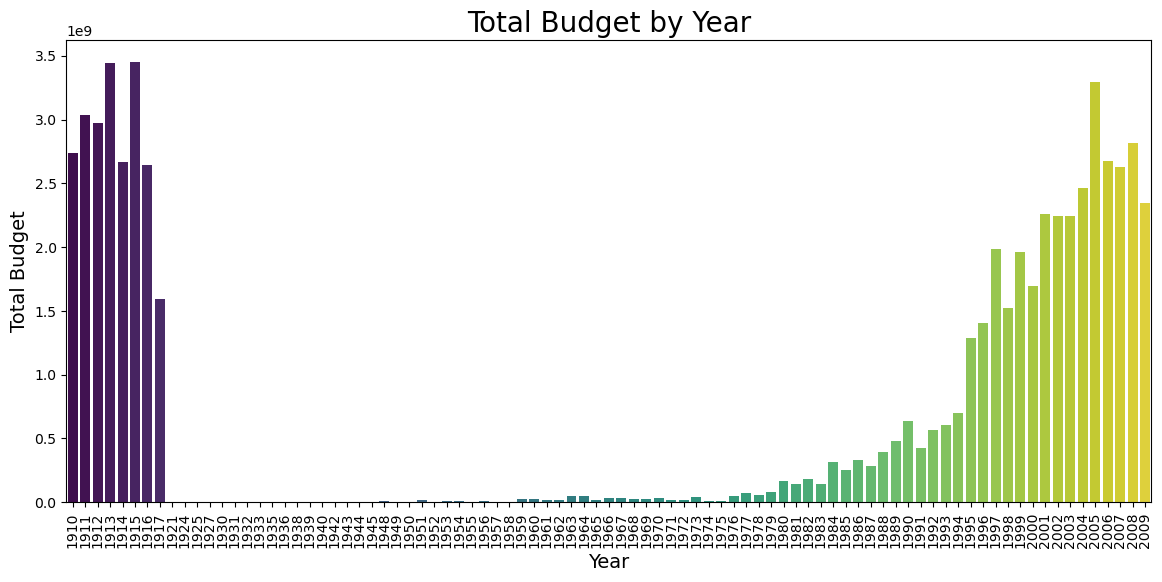

In [183]:
plt.figure(figsize=(14, 6))
budget_by_year = df_train.groupby(["year"])["budget"].sum()
sns.barplot(x=budget_by_year.index, y=budget_by_year.values, palette="viridis")

plt.title("Total Budget by Year", fontsize=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Budget", fontsize=14)
plt.xticks(rotation=90)  
plt.show()

**Observation:** There are two years which have a very close budget which are 1913 and 1914 and the highest budget in the 2000s was in the year 2005. 

### What is the name of the companies that produced the most movies in the dataset? 

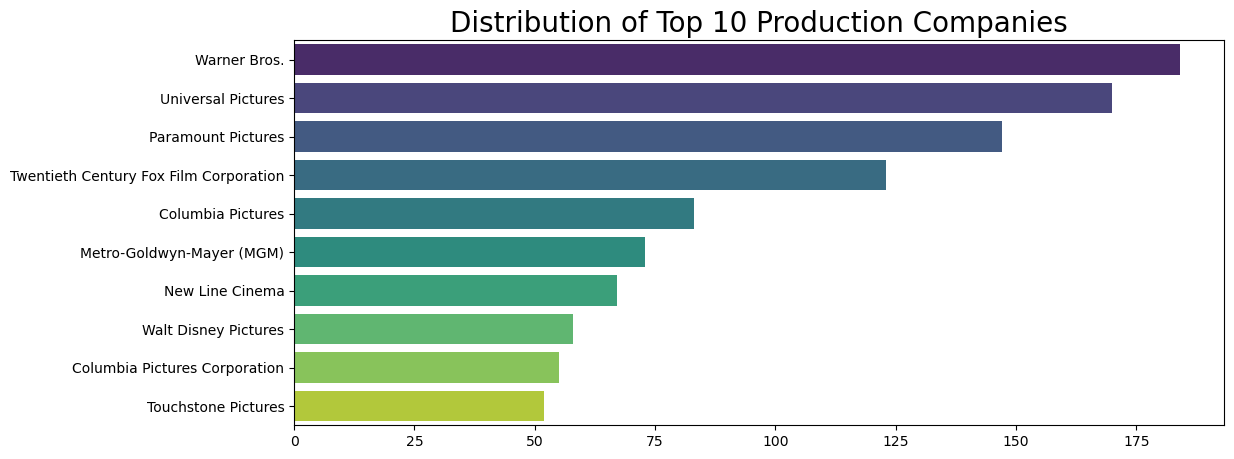

In [184]:
plt.figure(figsize=(12, 5))

production_companies_counts = df_train["production_companies"].explode().value_counts()[:10]

sns.barplot(x=production_companies_counts.values, y=production_companies_counts.index, palette="viridis")
plt.title("Distribution of Top 10 Production Companies", fontsize=20)
plt.show()

**Observation:** Warners Bros. is the name of the companies that produced the highest movies which is followed by Universal Pictures

### Who are the top 20 crews in every movies in the dataset? 

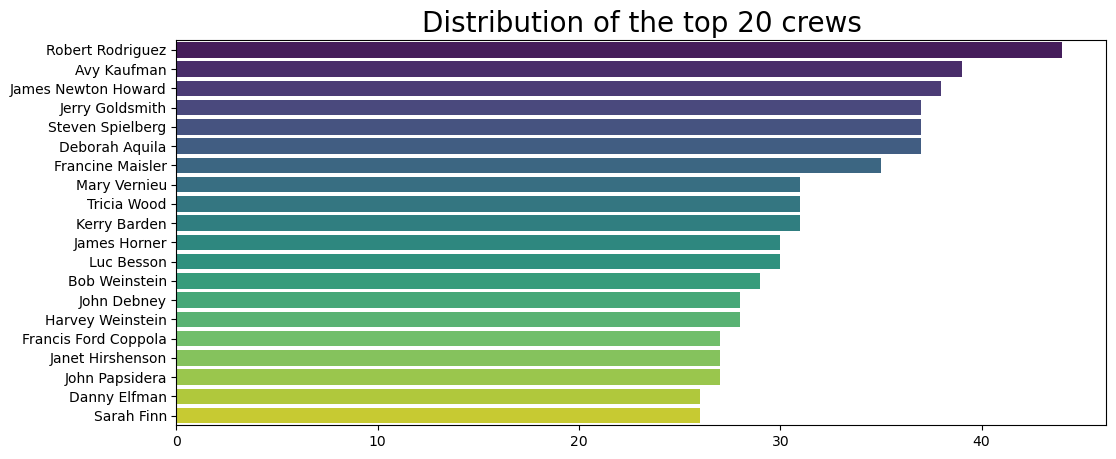

In [185]:
plt.figure(figsize=(12, 5))

crew_counts = df_train["crew"].explode().value_counts()[:20]

sns.barplot(x=crew_counts.values, y=crew_counts.index, palette="viridis")
plt.title("Distribution of the top 20 crews", fontsize=20)
plt.show()

**Observation** Robert Rodriguez happens to be the most popular crew in every movies while the least of the top 20 is Sarah Finn

### How distributed is the runtime in the dataset?

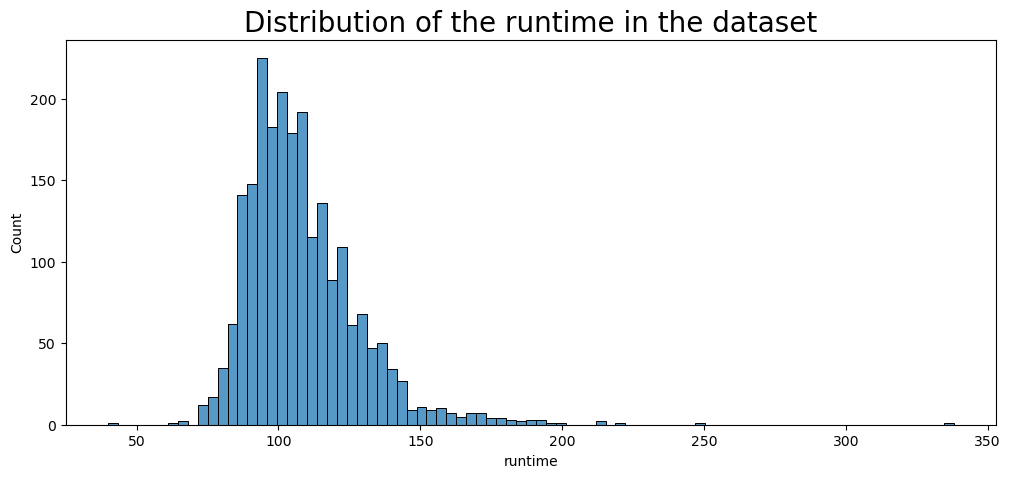

In [186]:
plt.figure(figsize=(12, 5))

sns.histplot(x="runtime", data=df_train)
plt.title("Distribution of the runtime in the dataset", fontsize=20)
plt.show()

**Observation:** The runtime is a bit normal and not too skewed to the left. Most of the runtime is between 50 and 200

### What are the most popular keywords in every movies in the dataset?

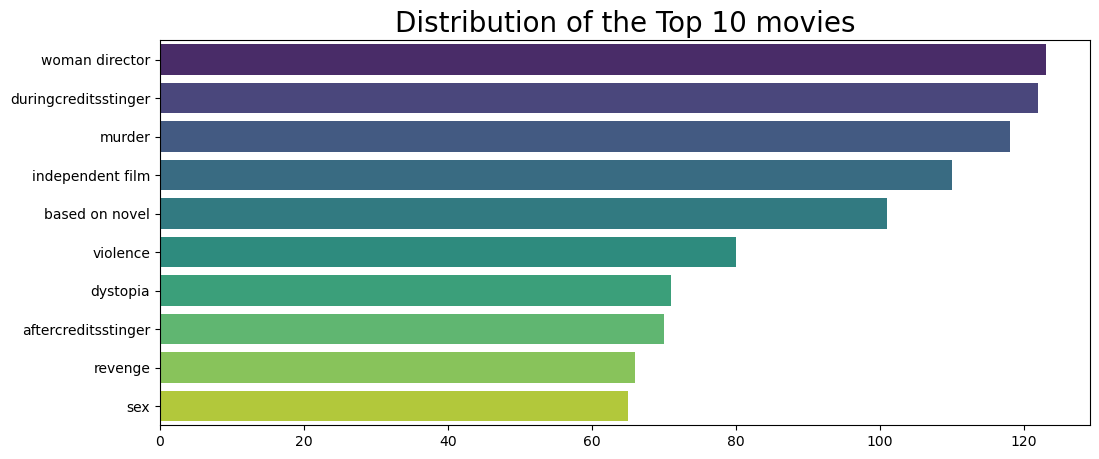

In [187]:
plt.figure(figsize=(12, 5))

keywords_counts = df_train["keywords"].explode().value_counts()[:10]

sns.barplot(x=keywords_counts.values, y=keywords_counts.index, palette="viridis")
plt.title("Distribution of the Top 10 movies", fontsize=20)
plt.show()

**Observation:** The most popular keywords is woman director followed by duringcreditsstinger

### What is the average movies runtime for each year?

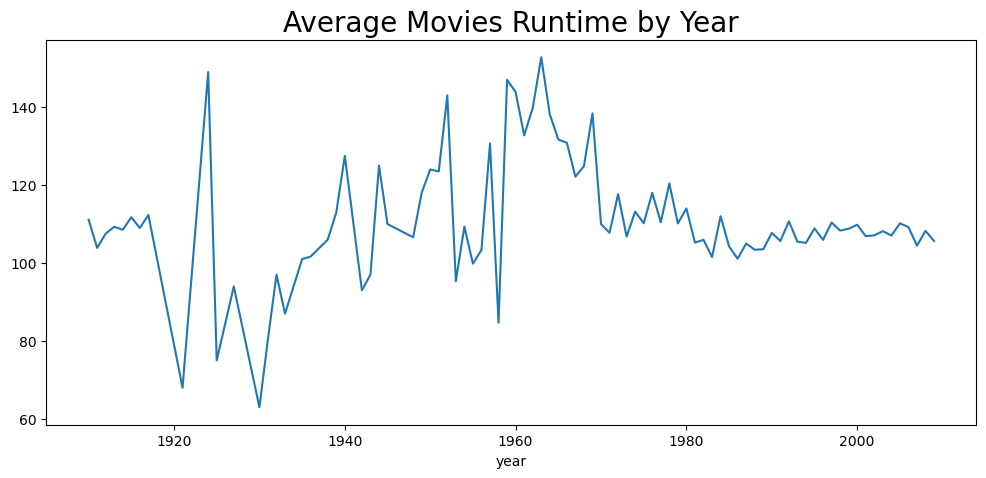

In [188]:
plt.figure(figsize=(12, 5))

year_by_runtime = df_train.groupby(["year"])["runtime"].mean()

sns.lineplot(x=year_by_runtime.index, y=year_by_runtime.values)
plt.title("Average Movies Runtime by Year", fontsize=20)
plt.show()

**Observation:** The peak year of average movies by year is around after 1960 followed by year after 1920 and after the 1900's there have been a stagnant runtime in the 2000's over the years

<a id="section-seven"></a>
# 7. Modeling

In [189]:
numerical_cols = df_train.select_dtypes(exclude=["object", "datetime64[ns]"])

numerical_cols = numerical_cols.drop(["revenue"],  axis="columns").columns.to_list()

numerical_cols

['budget',
 'popularity',
 'runtime',
 'production_companies_counts',
 'genres_counts',
 'spoken_languages_counts',
 'year',
 'month',
 'day',
 'production_countries_counts',
 'keywords_counts',
 'cast_counts',
 'crew_counts',
 'belongs_to_collection_counts']

In [190]:
categorical_cols = df_train[["belongs_to_collection", "original_title", "original_language", "status"]].columns.to_list()

categorical_cols

['belongs_to_collection', 'original_title', 'original_language', 'status']

In [191]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ("ordinal encoder", categorical_preprocessor, categorical_cols),
    ("standard-scaler", numerical_preprocessor, numerical_cols)
])

preprocessor

ColumnTransformer(transformers=[('ordinal encoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['belongs_to_collection', 'original_title',
                                  'original_language', 'status']),
                                ('standard-scaler', StandardScaler(),
                                 ['budget', 'popularity', 'runtime',
                                  'production_companies_counts',
                                  'genres_counts', 'spoken_languages_counts',
                                  'year', 'month', 'day',
                                  'production_countries_counts',
                                  'keywords_counts', 'cast_counts',
                                  'crew_counts',
                                  'belongs_to_collection_counts'])])

In [192]:
model = make_pipeline(preprocessor, RandomForestRegressor())

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken_languages_counts',
                                                   'year', 'month', 'day',
                                                   'production_countries_counts',
                                                   'keywords_counts',
                                                   'cast_counts', 'crew_counts',
                                                   'belongs_to_collection_counts'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [193]:
X = df_train.drop(["revenue"], axis="columns")
y = df_train["revenue"]

In [194]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken_languages_counts',
                                                   'year', 'month', 'day',
                                                   'production_countries_counts',
                                                   'keywords_counts',
                                                   'cast_counts', 'crew_counts',
                                                   'belongs_to_collection_counts'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [196]:
MSE_CV_scores = -cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_absolute_error", n_jobs=-1)

print(f"CV MSE: {MSE_CV_scores.mean():.2f}")

CV MSE: 51924194.92


In [197]:
y_pred_train = model.predict(X_train)

print(f"Train MSE: {mean_absolute_error(y_train, y_pred_train)}")

Train MSE: 18436923.690551285


In [198]:
y_pred_test = model.predict(X_valid)

print(f"Test MSE: {mean_absolute_error(y_valid, y_pred_test)}")

Test MSE: 48350026.28997011


In [199]:
MSE_CV_scores = -cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

In [200]:
RMSE_CV = (MSE_CV_scores.mean()**(1/2))

print(f"CV RMSE: {RMSE_CV:.2f}")

CV RMSE: 90182010.21


In [201]:
print(f"Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}")

Train RMSE: 33074595.945971433


In [202]:
print(f"Test RMSE: {mean_squared_error(y_valid, y_pred_test, squared=False)}")

Test RMSE: 85594554.71155086


In [203]:
cv = ShuffleSplit(n_splits=40, test_size=40, random_state=42)
cv_results = cross_validate(model, X, y, cv=cv, scoring="neg_mean_absolute_error")

In [204]:
cv_results = pd.DataFrame(cv_results)

cv_results.head()

,fit_time,score_time,test_score
0,3.331721,0.011517,-7.204228e+07
1,3.087284,0.015668,-4.580671e+07
2,2.464043,0.015664,-4.136712e+07
3,3.232094,0.008520,-4.872144e+07
4,3.356994,0.022607,-5.301491e+07


In [205]:
cv_results["test_error"] = -cv_results["test_score"]

cv_results.head()

,fit_time,score_time,test_score,test_error
0,3.331721,0.011517,-7.204228e+07,7.204228e+07
1,3.087284,0.015668,-4.580671e+07,4.580671e+07
2,2.464043,0.015664,-4.136712e+07,4.136712e+07
3,3.232094,0.008520,-4.872144e+07,4.872144e+07
4,3.356994,0.022607,-5.301491e+07,5.301491e+07


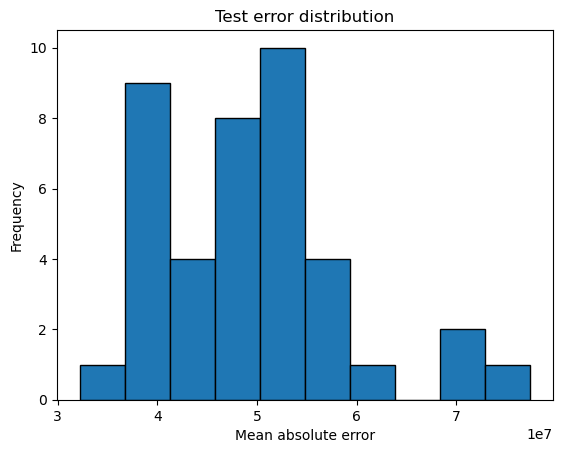

In [206]:
cv_results["test_error"].plot(kind="hist", edgecolor="black")
plt.xlabel("Mean absolute error")
plt.title("Test error distribution")
plt.show()

**Observation:** The testing error is clustered around $50 million and it ranges from around $30 million to $80 million

In [207]:
print(f"The mean cross-validated testing error is ${cv_results['test_error'].mean():.2f} million")

The mean cross-validated testing error is $49107496.30 million


In [208]:
print(f"The standard deviation cross-validated testing error is ${cv_results['test_error'].std():.2f} million")

The standard deviation cross-validated testing error is $9879676.68 million


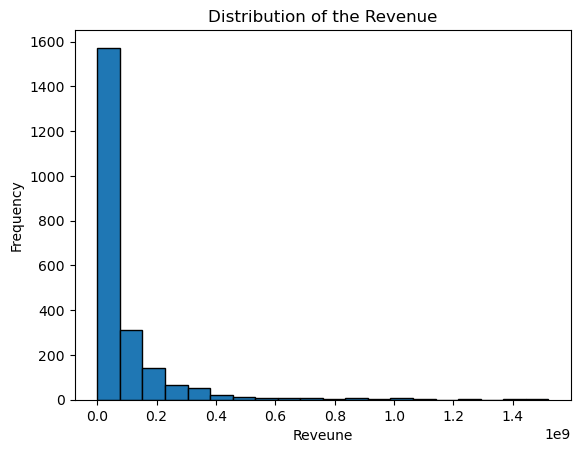

In [209]:
y.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Reveune")
plt.title("Distribution of the Revenue")
plt.show()

In [210]:
print(f"The mean cross-validated testing error is ${y.mean():.2f} million")

The mean cross-validated testing error is $82387302.61 million


In [211]:
print(f"The standard deviation cross-validated testing error is ${y.std():.2f} million")

The standard deviation cross-validated testing error is $150525838.17 million


In [212]:
cv = ShuffleSplit(n_splits=40, test_size=0.3)
cv_results = cross_validate(model, X, y, cv=cv, scoring="neg_mean_absolute_error", return_train_score=True, n_jobs=2)

cv_results = pd.DataFrame(cv_results)

In [213]:
scores = pd.DataFrame()
scores[["train_error", "test_error"]] = -cv_results[["train_score", "test_score"]] 

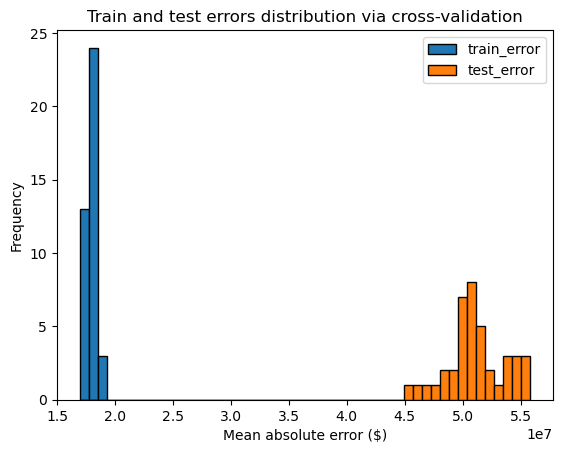

In [214]:
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error ($)")
plt.title("Train and test errors distribution via cross-validation")
plt.show()

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "max_depth": [2, 4, 6, 8, 10], 
    "min_samples_leaf": [0.1, 0.2, 0.3], 
    "max_features": ["log2", "sqrt"],
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=3, refit=True, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)

In [217]:
model_two = make_pipeline(preprocessor, grid_rf)

model_two

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken...
                                                   'production_countries_counts',
                                                   'keywords_counts',
                                                   'cast_counts', 'crew_counts',
                                                   'belongs_to_collection_counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [2, 4, 6, 8, 10],
                                          'max_features': ['log2', 'sqrt'],
                                          'min_samples_leaf': [0.1, 0.2, 0.3],
                                          'n_estimators': [50, 100, 200, 300,
                                                           400, 500]},
                              scoring='neg_mean_absolute_error', verbose=1))])

In [218]:
model_two.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken...
                                                   'production_countries_counts',
                                                   'keywords_counts',
                                                   'cast_counts', 'crew_counts',
                                                   'belongs_to_collection_counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [2, 4, 6, 8, 10],
                                          'max_features': ['log2', 'sqrt'],
                                          'min_samples_leaf': [0.1, 0.2, 0.3],
                                          'n_estimators': [50, 100, 200, 300,
                                                           400, 500]},
                              scoring='neg_mean_absolute_error', verbose=1))])

In [219]:
mean_absolute_error(y_valid, model_two.predict(X_valid))

65619237.313172124

In [220]:
model_three = make_pipeline(preprocessor, xgb.XGBRegressor())
model_three

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken...
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [221]:
model_three

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken...
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [222]:
model_three.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['belongs_to_collection',
                                                   'original_title',
                                                   'original_language',
                                                   'status']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['budget', 'popularity',
                                                   'runtime',
                                                   'production_companies_counts',
                                                   'genres_counts',
                                                   'spoken...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [223]:
mean_absolute_error(y_valid, model_three.predict(X_valid))

55522496.37397235